In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import re
from datetime import datetime

In [2]:
user_problem = pd.read_csv("/kaggle/input/merge-problem-final/user_problem_final.csv")
user_problem

,problem_id,user_id,is_correct,attempts,score,exercise_id,course_id,score_pm_info,location_pm_info,context_id_pm_info,language_pm_info,user_enroll_time,submit_date,submit_clock_time,duration_days
0,Pm_6906522,U_10000,0,1,0.0,Ex_7007033,C_2033958,1.0,7.4,"[7007037, 7007038, 7007039, 7007040]",Chinese,2020-10-27,2020-10-27,10:11:56,0
1,Pm_6906523,U_10000,0,1,0.0,Ex_7007033,C_2033958,1.0,7.4,"[7007037, 7007038, 7007039, 7007040]",Chinese,2020-10-27,2020-10-27,10:12:13,0
2,Pm_6906524,U_10000,1,1,1.0,Ex_7007033,C_2033958,1.0,7.4,"[7007037, 7007038, 7007039, 7007040]",Chinese,2020-10-27,2020-10-27,10:12:28,0
3,Pm_6906525,U_10000,0,1,0.0,Ex_7007033,C_2033958,1.0,7.4,"[7007037, 7007038, 7007039, 7007040]",Chinese,2020-10-27,2020-10-27,10:14:56,0
4,Pm_6906526,U_10000,0,1,0.0,Ex_7007033,C_2033958,2.0,7.4,"[7007037, 7007038, 7007039, 7007040]",Chinese,2020-10-27,2020-10-27,10:15:18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859325,Pm_6093583,U_99772,1,1,1.0,Ex_6179349,C_1903985,1.0,7.3,"[6392162, 6392163, 6392166, 6392169]",Chinese,2020-08-01,2020-08-28,15:10:25,27
11859326,Pm_6093584,U_99772,1,1,2.0,Ex_6179349,C_1903985,2.0,7.3,"[6392162, 6392163, 6392166, 6392169]",Chinese,2020-08-01,2020-08-27,17:12:01,26
11859327,Pm_6093585,U_99772,1,1,2.0,Ex_6179349,C_1903985,2.0,7.3,"[6392162, 6392163, 6392166, 6392169]",Chinese,2020-08-01,2020-08-28,14:07:19,27
11859328,Pm_6093586,U_99772,1,1,2.0,Ex_6179349,C_1903985,2.0,7.3,"[6392162, 6392163, 6392166, 6392169]",Chinese,2020-08-01,2020-08-29,01:22:32,28


Đếm số lượng text liên quan

In [3]:
def count_contexts(val):
    if pd.isna(val) or val in ["", "[]"]:
        return 0
    # Remove brackets and split by comma
    return len([x for x in val.strip("[]").split(",") if x.strip() != ""])

user_problem['num_context_ids'] = user_problem['context_id_pm_info'].apply(count_contexts)

In [4]:
user_problem

,problem_id,user_id,is_correct,attempts,score,exercise_id,course_id,score_pm_info,location_pm_info,context_id_pm_info,language_pm_info,user_enroll_time,submit_date,submit_clock_time,duration_days,num_context_ids
0,Pm_6906522,U_10000,0,1,0.0,Ex_7007033,C_2033958,1.0,7.4,"[7007037, 7007038, 7007039, 7007040]",Chinese,2020-10-27,2020-10-27,10:11:56,0,4
1,Pm_6906523,U_10000,0,1,0.0,Ex_7007033,C_2033958,1.0,7.4,"[7007037, 7007038, 7007039, 7007040]",Chinese,2020-10-27,2020-10-27,10:12:13,0,4
2,Pm_6906524,U_10000,1,1,1.0,Ex_7007033,C_2033958,1.0,7.4,"[7007037, 7007038, 7007039, 7007040]",Chinese,2020-10-27,2020-10-27,10:12:28,0,4
3,Pm_6906525,U_10000,0,1,0.0,Ex_7007033,C_2033958,1.0,7.4,"[7007037, 7007038, 7007039, 7007040]",Chinese,2020-10-27,2020-10-27,10:14:56,0,4
4,Pm_6906526,U_10000,0,1,0.0,Ex_7007033,C_2033958,2.0,7.4,"[7007037, 7007038, 7007039, 7007040]",Chinese,2020-10-27,2020-10-27,10:15:18,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859325,Pm_6093583,U_99772,1,1,1.0,Ex_6179349,C_1903985,1.0,7.3,"[6392162, 6392163, 6392166, 6392169]",Chinese,2020-08-01,2020-08-28,15:10:25,27,4
11859326,Pm_6093584,U_99772,1,1,2.0,Ex_6179349,C_1903985,2.0,7.3,"[6392162, 6392163, 6392166, 6392169]",Chinese,2020-08-01,2020-08-27,17:12:01,26,4
11859327,Pm_6093585,U_99772,1,1,2.0,Ex_6179349,C_1903985,2.0,7.3,"[6392162, 6392163, 6392166, 6392169]",Chinese,2020-08-01,2020-08-28,14:07:19,27,4
11859328,Pm_6093586,U_99772,1,1,2.0,Ex_6179349,C_1903985,2.0,7.3,"[6392162, 6392163, 6392166, 6392169]",Chinese,2020-08-01,2020-08-29,01:22:32,28,4


Chuyển language
- Nếu English thì = 1
- Nếu Chinese hoặc Nan thì = 0

In [5]:
user_problem['language_binary'] = user_problem['language_pm_info'].map({
    'English': 1,
    'Chinese': 0
}).fillna(0)

In [6]:
user_problem = user_problem.drop(['context_id_pm_info', 'language_pm_info', 'user_enroll_time'], axis = 1)

In [7]:
user_problem = user_problem.sort_values(by=['user_id', 'course_id', 'exercise_id', 'problem_id'])
user_problem

,problem_id,user_id,is_correct,attempts,score,exercise_id,course_id,score_pm_info,location_pm_info,submit_date,submit_clock_time,duration_days,num_context_ids,language_binary
0,Pm_6906522,U_10000,0,1,0.0,Ex_7007033,C_2033958,1.0,7.4,2020-10-27,10:11:56,0,4,0.0
1,Pm_6906523,U_10000,0,1,0.0,Ex_7007033,C_2033958,1.0,7.4,2020-10-27,10:12:13,0,4,0.0
2,Pm_6906524,U_10000,1,1,1.0,Ex_7007033,C_2033958,1.0,7.4,2020-10-27,10:12:28,0,4,0.0
3,Pm_6906525,U_10000,0,1,0.0,Ex_7007033,C_2033958,1.0,7.4,2020-10-27,10:14:56,0,4,0.0
4,Pm_6906526,U_10000,0,1,0.0,Ex_7007033,C_2033958,2.0,7.4,2020-10-27,10:15:18,0,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859325,Pm_6093583,U_99772,1,1,1.0,Ex_6179349,C_1903985,1.0,7.3,2020-08-28,15:10:25,27,4,0.0
11859326,Pm_6093584,U_99772,1,1,2.0,Ex_6179349,C_1903985,2.0,7.3,2020-08-27,17:12:01,26,4,0.0
11859327,Pm_6093585,U_99772,1,1,2.0,Ex_6179349,C_1903985,2.0,7.3,2020-08-28,14:07:19,27,4,0.0
11859328,Pm_6093586,U_99772,1,1,2.0,Ex_6179349,C_1903985,2.0,7.3,2020-08-29,01:22:32,28,4,0.0


In [8]:
user_problem.describe()

,is_correct,attempts,score,score_pm_info,duration_days,num_context_ids,language_binary
count,1.185933e+07,1.185933e+07,1.185933e+07,1.185933e+07,1.185933e+07,1.185933e+07,1.185933e+07
mean,8.456189e-01,1.081003e+00,1.066723e+00,1.296127e+00,4.131418e+01,2.351791e+00,5.511247e-02
std,3.613137e-01,4.826361e-01,1.079985e+00,1.218891e+00,5.194643e+01,3.252603e+00,2.281997e-01
min,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.400000e+01,3.000000e+00,0.000000e+00
max,1.000000e+00,1.900000e+02,1.000000e+02,1.000000e+02,4.450000e+02,4.100000e+01,1.000000e+00


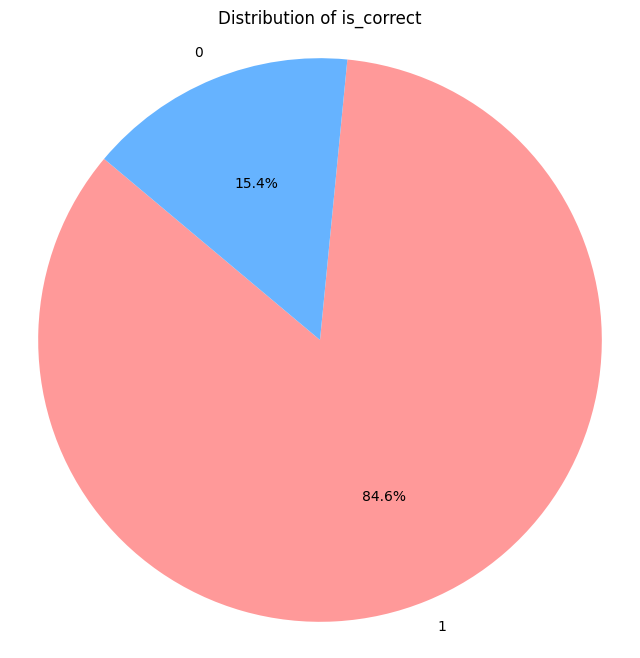

In [9]:
# Count the occurrences of is_correct
is_correct_counts = user_problem['is_correct'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(is_correct_counts, labels=is_correct_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999','#66B3FF'])
plt.title('Distribution of is_correct')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

In [10]:
grouped_lists = user_problem.groupby(['user_id', 'course_id', 'exercise_id']).agg({
    'is_correct': ['sum', 'count', 'mean', list],
    'attempts': ['sum','mean', list],
    'score': ['sum', list],
    'score_pm_info': ['sum', list],
    'submit_date':  ['min', 'max',list],
    'submit_clock_time': ['min', 'max',list],
    'duration_days': 'mean',
    'num_context_ids': 'mean',
    'language_binary': 'mean'
}).reset_index()

grouped_lists

user_id  course_id exercise_id is_correct                  \
                                                 sum count      mean   
0          U_10000  C_2033958  Ex_7007033          1     7  0.142857   
1        U_1000454  C_2199449  Ex_7396062          3     3  1.000000   
2        U_1000979   C_947149  Ex_1431533          5     5  1.000000   
3        U_1000979   C_947149  Ex_1431535          5     5  1.000000   
4        U_1000979   C_947149  Ex_1431537          5     5  1.000000   
...            ...        ...         ...        ...   ...       ...   
2036019    U_99772  C_1903985  Ex_6179341         34    40  0.850000   
2036020    U_99772  C_1903985  Ex_6179343         16    20  0.800000   
2036021    U_99772  C_1903985  Ex_6179345          8    10  0.800000   
2036022    U_99772  C_1903985  Ex_6179347          6     6  1.000000   
2036023    U_99772  C_1903985  Ex_6179349          9    10  0.900000   

                                                           attempts       \
                                                      list      sum mean   
0                                    [0, 0, 1, 0, 0, 0, 0]        7  1.0   
1                                                [1, 1, 1]        3  1.0   
2                                          [1, 1, 1, 1, 1]        5  1.0   
3                                          [1, 1, 1, 1, 1]        5  1.0   
4                                          [1, 1, 1, 1, 1]        5  1.0   
...                                                    ...      ...  ...   
2036019  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...       40  1.0   
2036020  [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...       20  1.0   
2036021                     [1, 1, 1, 1, 1, 1, 0, 1, 1, 0]       10  1.0   
2036022                                 [1, 1, 1, 1, 1, 1]        6  1.0   
2036023                     [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]       10  1.0   

                                                            ...  \
                                                      list  ...   
0                                    [1, 1, 1, 1, 1, 1, 1]  ...   
1                                                [1, 1, 1]  ...   
2                                          [1, 1, 1, 1, 1]  ...   
3                                          [1, 1, 1, 1, 1]  ...   
4                                          [1, 1, 1, 1, 1]  ...   
...                                                    ...  ...   
2036019  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  ...   
2036020  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  ...   
2036021                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  ...   
2036022                                 [1, 1, 1, 1, 1, 1]  ...   
2036023                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  ...   

                                             score_pm_info submit_date  \
                                                      list         min   
0                      [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0]  2020-10-27   
1                                          [1.0, 1.0, 1.0]  2020-10-15   
2                                [0.8, 0.8, 0.8, 0.8, 0.8]  2020-05-19   
3                                [0.8, 0.8, 0.8, 0.8, 0.8]  2020-05-19   
4                                [0.8, 0.8, 0.8, 0.8, 0.8]  2020-05-19   
...                                                    ...         ...   
2036019  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  2020-08-13   
2036020  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...  2020-08-23   
2036021  [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...  2020-08-24   
2036022                     [1.0, 1.0, 1.0, 1.0, 1.0, 2.0]  2020-08-27   
2036023  [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...  2020-08-27   

                                                                        \
                max                                               list   
0        2020-10-27  [2020-10-27, 2020-10-27, 2020-10-27, 2020-10-2...   
1        2020-10-15         

In [11]:
# Flatten the column names
grouped_lists.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in grouped_lists.columns]

# Now 'grouped_lists' will have flattened column names
grouped_lists

,user_id_,course_id_,exercise_id_,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,...,score_pm_info_list,submit_date_min,submit_date_max,submit_date_list,submit_clock_time_min,submit_clock_time_max,submit_clock_time_list,duration_days_mean,num_context_ids_mean,language_binary_mean
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",...,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0]",2020-10-27,2020-10-27,"[2020-10-27, 2020-10-27, 2020-10-27, 2020-10-2...",10:11:56,10:16:21,"[10:11:56, 10:12:13, 10:12:28, 10:14:56, 10:15...",0.00,4.0,0.0
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",...,"[1.0, 1.0, 1.0]",2020-10-15,2020-10-15,"[2020-10-15, 2020-10-15, 2020-10-15]",21:11:03,21:11:30,"[21:11:03, 21:11:19, 21:11:30]",3.00,0.0,0.0
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:23:42,14:23:52,"[14:23:52, 14:23:50, 14:23:48, 14:23:46, 14:23...",77.00,1.0,0.0
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:24:20,14:25:18,"[14:25:18, 14:25:04, 14:24:48, 14:24:34, 14:24...",77.00,1.0,0.0
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:25:45,14:26:53,"[14:25:45, 14:26:00, 14:26:21, 14:26:35, 14:26...",77.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2020-08-13,2020-08-18,"[2020-08-14, 2020-08-18, 2020-08-18, 2020-08-1...",15:09:16,23:46:33,"[15:44:30, 15:09:51, 21:33:02, 15:35:44, 20:17...",15.25,5.0,0.0
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",2020-08-23,2020-09-10,"[2020-08-23, 2020-09-10, 2020-08-24, 2020-09-0...",00:37:16,23:44:24,"[23:40:36, 14:15:15, 01:49:01, 20:54:53, 15:18...",26.95,6.0,0.0
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",2020-08-24,2020-08-26,"[2020-08-24, 2020-08-24, 2020-08-26, 2020-08-2...",00:27:53,23:23:53,"[22:41:28, 16:51:51, 00:27:53, 17:35:08, 22:40...",24.20,2.0,0.0
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0]",2020-08-27,2020-08-27,"[2020-08-27, 2020-08-27, 2020-08-27, 2020-08-2...",00:40:14,14:29:06,"[00:40:14, 14:28:10, 14:28:39, 14:29:06, 00:40...",26.00,2.0,0.0


In [12]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

In [13]:
grouped_lists

,user_id_,course_id_,exercise_id_,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,score_sum,score_list,score_pm_info_sum,score_pm_info_list,submit_date_min,submit_date_max,submit_date_list,submit_clock_time_min,submit_clock_time_max,submit_clock_time_list,duration_days_mean,num_context_ids_mean,language_binary_mean
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",1.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",11.0,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0]",2020-10-27,2020-10-27,"[2020-10-27, 2020-10-27, 2020-10-27, 2020-10-2...",10:11:56,10:16:21,"[10:11:56, 10:12:13, 10:12:28, 10:14:56, 10:15...",0.00,4.0,0.0
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",3.0,"[1.0, 1.0, 1.0]",3.0,"[1.0, 1.0, 1.0]",2020-10-15,2020-10-15,"[2020-10-15, 2020-10-15, 2020-10-15]",21:11:03,21:11:30,"[21:11:03, 21:11:19, 21:11:30]",3.00,0.0,0.0
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:23:42,14:23:52,"[14:23:52, 14:23:50, 14:23:48, 14:23:46, 14:23...",77.00,1.0,0.0
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:24:20,14:25:18,"[14:25:18, 14:25:04, 14:24:48, 14:24:34, 14:24...",77.00,1.0,0.0
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:25:45,14:26:53,"[14:25:45, 14:26:00, 14:26:21, 14:26:35, 14:26...",77.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",50.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",60.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2020-08-13,2020-08-18,"[2020-08-14, 2020-08-18, 2020-08-18, 2020-08-1...",15:09:16,23:46:33,"[15:44:30, 15:09:51, 21:33:02, 15:35:44, 20:17...",15.25,5.0,0.0
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",24.0,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",30.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",2020-08-23,2020-09-10,"[2020-08-23, 2020-09-10, 2020-08-24, 2020-09-0...",00:37:16,23:44:24,"[23:40:36, 14:15:15, 01:49:01, 20:54:53, 15:18...",26.95,6.0,0.0
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",11.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 2.0, ...",15.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",2020-08-24,2020-08-26,"[2020-08-24, 2020-08-24, 2020-08-26, 2020-08-2...",00:27:53,23:23:53,"[22:41:28, 16:51:51, 00:27:53, 17:35:08, 22:40...",24.20,2.0,0.0
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",7.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0]",7.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0]",2020-08-27,2020-08-27,"[2020-08-27, 2020-08-27, 2020-08-27, 2020-08-2...",00:40:14,14:29:06,"[00:40:14, 14:28:10, 14:28:39, 14:29:06, 00:40...",26.00,2.0,0.0


In [14]:
# Combine date and time into datetime objects
min_submit_datetime = grouped_lists.apply(lambda row: datetime.strptime(f"{row['submit_date_min']} {row['submit_clock_time_min']}", '%Y-%m-%d %H:%M:%S'), axis=1)
max_submit_datetime = grouped_lists.apply(lambda row: datetime.strptime(f"{row['submit_date_max']} {row['submit_clock_time_max']}", '%Y-%m-%d %H:%M:%S'), axis=1)

# Calculate the difference in hours
grouped_lists['submit_time_diff_hours'] = (max_submit_datetime - min_submit_datetime).dt.total_seconds() / 3600

In [15]:
grouped_lists

,user_id_,course_id_,exercise_id_,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,score_sum,score_list,score_pm_info_sum,score_pm_info_list,submit_date_min,submit_date_max,submit_date_list,submit_clock_time_min,submit_clock_time_max,submit_clock_time_list,duration_days_mean,num_context_ids_mean,language_binary_mean,submit_time_diff_hours
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",1.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",11.0,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0]",2020-10-27,2020-10-27,"[2020-10-27, 2020-10-27, 2020-10-27, 2020-10-2...",10:11:56,10:16:21,"[10:11:56, 10:12:13, 10:12:28, 10:14:56, 10:15...",0.00,4.0,0.0,0.073611
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",3.0,"[1.0, 1.0, 1.0]",3.0,"[1.0, 1.0, 1.0]",2020-10-15,2020-10-15,"[2020-10-15, 2020-10-15, 2020-10-15]",21:11:03,21:11:30,"[21:11:03, 21:11:19, 21:11:30]",3.00,0.0,0.0,0.007500
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:23:42,14:23:52,"[14:23:52, 14:23:50, 14:23:48, 14:23:46, 14:23...",77.00,1.0,0.0,0.002778
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:24:20,14:25:18,"[14:25:18, 14:25:04, 14:24:48, 14:24:34, 14:24...",77.00,1.0,0.0,0.016111
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:25:45,14:26:53,"[14:25:45, 14:26:00, 14:26:21, 14:26:35, 14:26...",77.00,1.0,0.0,0.018889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",50.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",60.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2020-08-13,2020-08-18,"[2020-08-14, 2020-08-18, 2020-08-18, 2020-08-1...",15:09:16,23:46:33,"[15:44:30, 15:09:51, 21:33:02, 15:35:44, 20:17...",15.25,5.0,0.0,128.621389
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",24.0,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",30.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",2020-08-23,2020-09-10,"[2020-08-23, 2020-09-10, 2020-08-24, 2020-09-0...",00:37:16,23:44:24,"[23:40:36, 14:15:15, 01:49:01, 20:54:53, 15:18...",26.95,6.0,0.0,455.118889
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",11.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 2.0, ...",15.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",2020-08-24,2020-08-26,"[2020-08-24, 2020-08-24, 2020-08-26, 2020-08-2...",00:27:53,23:23:53,"[22:41:28, 16:51:51, 00:27:53, 17:35:08, 22:40...",24.20,2.0,0.0,70.933333
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",7.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0]",7.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0]",2020-08-27,2020-08-27,"[2020-08-27, 2020-08-27, 2020-08-27, 2020-08-2...",00:40:14,14:29:06,"[00:40:14, 14:28:10, 14:28:39, 14:29:06, 00:40...",26.00,2.0,0.0,13.814444


In [16]:
grouped_lists['submit_hours_unique'] = grouped_lists['submit_clock_time_list'].apply(
    lambda times: [int(t.split(':')[0]) for t in times]
)
grouped_lists

,user_id_,course_id_,exercise_id_,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,score_sum,score_list,score_pm_info_sum,score_pm_info_list,submit_date_min,submit_date_max,submit_date_list,submit_clock_time_min,submit_clock_time_max,submit_clock_time_list,duration_days_mean,num_context_ids_mean,language_binary_mean,submit_time_diff_hours,submit_hours_unique
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",1.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",11.0,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0]",2020-10-27,2020-10-27,"[2020-10-27, 2020-10-27, 2020-10-27, 2020-10-2...",10:11:56,10:16:21,"[10:11:56, 10:12:13, 10:12:28, 10:14:56, 10:15...",0.00,4.0,0.0,0.073611,"[10, 10, 10, 10, 10, 10, 10]"
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",3.0,"[1.0, 1.0, 1.0]",3.0,"[1.0, 1.0, 1.0]",2020-10-15,2020-10-15,"[2020-10-15, 2020-10-15, 2020-10-15]",21:11:03,21:11:30,"[21:11:03, 21:11:19, 21:11:30]",3.00,0.0,0.0,0.007500,"[21, 21, 21]"
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:23:42,14:23:52,"[14:23:52, 14:23:50, 14:23:48, 14:23:46, 14:23...",77.00,1.0,0.0,0.002778,"[14, 14, 14, 14, 14]"
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:24:20,14:25:18,"[14:25:18, 14:25:04, 14:24:48, 14:24:34, 14:24...",77.00,1.0,0.0,0.016111,"[14, 14, 14, 14, 14]"
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:25:45,14:26:53,"[14:25:45, 14:26:00, 14:26:21, 14:26:35, 14:26...",77.00,1.0,0.0,0.018889,"[14, 14, 14, 14, 14]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",50.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",60.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2020-08-13,2020-08-18,"[2020-08-14, 2020-08-18, 2020-08-18, 2020-08-1...",15:09:16,23:46:33,"[15:44:30, 15:09:51, 21:33:02, 15:35:44, 20:17...",15.25,5.0,0.0,128.621389,"[15, 15, 21, 15, 20, 15, 17, 17, 23, 23, 23, 2..."
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",24.0,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",30.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",2020-08-23,2020-09-10,"[2020-08-23, 2020-09-10, 2020-08-24, 2020-09-0...",00:37:16,23:44:24,"[23:40:36, 14:15:15, 01:49:01, 20:54:53, 15:18...",26.95,6.0,0.0,455.118889,"[23, 14, 1, 20, 15, 15, 22, 19, 23, 23, 23, 23..."
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",11.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 2.0, ...",15.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",2020-08-24,2020-08-26,"[2020-08-24, 2020-08-24, 2020-08-26, 2020-08-2...",00:27:53,23:23:53,"[22:41:28, 16:51:51, 00:27:53, 17:35:08, 22:40...",24.20,2.0,0.0,70.933333,"[22, 16, 0, 17, 22, 16, 23, 23, 17, 23]"
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",7.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0]",7.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0]",2020-08-27,2020-08-27,"[2020-08-27, 2020-08-27, 2020-08-27, 2020-08-2...",00:40:14,14:29:06,"[00:40:14, 14:28:10, 14:28:39, 14:29:06, 00:40...",26.00,2.0,0.0,13.814444,"[0, 14, 14, 14, 0, 0]"

In [17]:
grouped_lists['percentage_correct'] = grouped_lists['is_correct_sum']/grouped_lists['is_correct_count']
grouped_lists['percentage_score'] = np.where(
    grouped_lists['score_pm_info_sum'] == 0,
    grouped_lists['percentage_correct'],
    grouped_lists['score_sum'] / grouped_lists['score_pm_info_sum'] 
)
grouped_lists

,user_id_,course_id_,exercise_id_,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,score_sum,score_list,score_pm_info_sum,score_pm_info_list,submit_date_min,submit_date_max,submit_date_list,submit_clock_time_min,submit_clock_time_max,submit_clock_time_list,duration_days_mean,num_context_ids_mean,language_binary_mean,submit_time_diff_hours,submit_hours_unique,percentage_correct,percentage_score
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",1.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",11.0,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0]",2020-10-27,2020-10-27,"[2020-10-27, 2020-10-27, 2020-10-27, 2020-10-2...",10:11:56,10:16:21,"[10:11:56, 10:12:13, 10:12:28, 10:14:56, 10:15...",0.00,4.0,0.0,0.073611,"[10, 10, 10, 10, 10, 10, 10]",0.142857,0.090909
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",3.0,"[1.0, 1.0, 1.0]",3.0,"[1.0, 1.0, 1.0]",2020-10-15,2020-10-15,"[2020-10-15, 2020-10-15, 2020-10-15]",21:11:03,21:11:30,"[21:11:03, 21:11:19, 21:11:30]",3.00,0.0,0.0,0.007500,"[21, 21, 21]",1.000000,1.000000
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:23:42,14:23:52,"[14:23:52, 14:23:50, 14:23:48, 14:23:46, 14:23...",77.00,1.0,0.0,0.002778,"[14, 14, 14, 14, 14]",1.000000,1.000000
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:24:20,14:25:18,"[14:25:18, 14:25:04, 14:24:48, 14:24:34, 14:24...",77.00,1.0,0.0,0.016111,"[14, 14, 14, 14, 14]",1.000000,1.000000
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:25:45,14:26:53,"[14:25:45, 14:26:00, 14:26:21, 14:26:35, 14:26...",77.00,1.0,0.0,0.018889,"[14, 14, 14, 14, 14]",1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",50.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",60.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2020-08-13,2020-08-18,"[2020-08-14, 2020-08-18, 2020-08-18, 2020-08-1...",15:09:16,23:46:33,"[15:44:30, 15:09:51, 21:33:02, 15:35:44, 20:17...",15.25,5.0,0.0,128.621389,"[15, 15, 21, 15, 20, 15, 17, 17, 23, 23, 23, 2...",0.850000,0.833333
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",24.0,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",30.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",2020-08-23,2020-09-10,"[2020-08-23, 2020-09-10, 2020-08-24, 2020-09-0...",00:37:16,23:44:24,"[23:40:36, 14:15:15, 01:49:01, 20:54:53, 15:18...",26.95,6.0,0.0,455.118889,"[23, 14, 1, 20, 15, 15, 22, 19, 23, 23, 23, 23...",0.800000,0.800000
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",11.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 2.0, ...",15.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",2020-08-24,2020-08-26,"[2020-08-24, 2020-08-24, 2020-08-26, 2020-08-2...",00:27:53,23:23:53,"[22:41:28, 16:51:51, 00:27:53, 17:35:08, 22:40...",24.20,2.0,0.0,70.933333,"[22, 16, 0, 17, 22, 16, 23, 23, 17, 23]",0.800000,0.733333
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",7.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0]",7.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0]",202

In [18]:
# Read the text file
exercise_problem = pd.read_csv('/kaggle/input/lightmooccubex/relations/exercise-problem.txt', sep='\t', header=None, names=['exercise_id', 'problem_id'])
exercise_problem

,exercise_id,problem_id
0,Ex_143,Pm_1
1,Ex_143,Pm_2
2,Ex_147,Pm_3
3,Ex_147,Pm_4
4,Ex_151,Pm_5
...,...,...
6252825,Ex_8600262,Pm_8602347
6252826,Ex_8753628,Pm_8602348
6252827,Ex_8753676,Pm_8602349
6252828,Ex_8753787,Pm_8602350


In [19]:
# Filter exercise_problem_df by checking if exercise_id exists in grouped_lists['exercise_id_']
filtered_exercise_problem = exercise_problem[exercise_problem['exercise_id'].isin(grouped_lists['exercise_id_'])]
filtered_exercise_problem

,exercise_id,problem_id
56993,Ex_40661,Pm_57757
56994,Ex_40661,Pm_57758
56995,Ex_40661,Pm_57759
56996,Ex_40661,Pm_57760
56997,Ex_40661,Pm_57761
...,...,...
6242269,Ex_8619891,Pm_8562137
6242270,Ex_8619891,Pm_8562138
6249020,Ex_8619929,Pm_8570821
6252574,Ex_6879992,Pm_8579511


In [20]:
# Bảng điểm giá trị điểm số lớn nhất của câu hỏi
problem_score = user_problem.groupby('problem_id')['score_pm_info'].max().reset_index()
problem_score

,problem_id,score_pm_info
0,Pm_100561,1.0
1,Pm_100562,1.0
2,Pm_100563,2.0
3,Pm_100564,2.0
4,Pm_100565,2.0
...,...,...
94470,Pm_97653,1.0
94471,Pm_97654,2.0
94472,Pm_97655,2.0
94473,Pm_97656,2.0


In [21]:
filtered_exercise_problem_score = pd.merge(filtered_exercise_problem, problem_score, on='problem_id', how='left')
filtered_exercise_problem_score

,exercise_id,problem_id,score_pm_info
0,Ex_40661,Pm_57757,1.0
1,Ex_40661,Pm_57758,1.0
2,Ex_40661,Pm_57759,1.0
3,Ex_40661,Pm_57760,1.0
4,Ex_40661,Pm_57761,1.0
...,...,...,...
100216,Ex_8619891,Pm_8562137,1.0
100217,Ex_8619891,Pm_8562138,1.0
100218,Ex_8619929,Pm_8570821,1.0
100219,Ex_6879992,Pm_8579511,1.0


In [22]:
problem_info =pd.read_json("/kaggle/input/lightmooccubex/entities/problem.json", lines=True)
# Select specific columns (you can change these column names based on your actual file)
columns_to_keep = ['problem_id', 'score', 'type']  # Example columns
problem_info = problem_info[columns_to_keep]
problem_info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,score,type
0,1730,1.0,1
1,1731,1.0,1
2,1732,1.0,1
3,1733,1.0,1
4,1734,1.0,1
...,...,...,...
2454417,8431749,NaN,1
2454418,8431750,NaN,1
2454419,8431751,NaN,1
2454420,8431752,NaN,1


In [23]:
problem_info['problem_id'] = problem_info['problem_id'].apply(lambda x: f'Pm_{x}')
problem_info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,score,type
0,Pm_1730,1.0,1
1,Pm_1731,1.0,1
2,Pm_1732,1.0,1
3,Pm_1733,1.0,1
4,Pm_1734,1.0,1
...,...,...,...
2454417,Pm_8431749,NaN,1
2454418,Pm_8431750,NaN,1
2454419,Pm_8431751,NaN,1
2454420,Pm_8431752,NaN,1


In [24]:
filtered_exercise_problem_score.isna().sum()

exercise_id         0
problem_id          0
score_pm_info    5746
dtype: int64

In [25]:
filtered_exercise_problem_score = pd.merge(filtered_exercise_problem_score, problem_info, on='problem_id', how='left')
filtered_exercise_problem_score

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,exercise_id,problem_id,score_pm_info,score,type
0,Ex_40661,Pm_57757,1.0,1.0,1.0
1,Ex_40661,Pm_57758,1.0,1.0,1.0
2,Ex_40661,Pm_57759,1.0,1.0,1.0
3,Ex_40661,Pm_57760,1.0,1.0,1.0
4,Ex_40661,Pm_57761,1.0,1.0,1.0
...,...,...,...,...,...
100216,Ex_8619891,Pm_8562137,1.0,NaN,NaN
100217,Ex_8619891,Pm_8562138,1.0,NaN,NaN
100218,Ex_8619929,Pm_8570821,1.0,NaN,NaN
100219,Ex_6879992,Pm_8579511,1.0,NaN,NaN


In [26]:
filtered_exercise_problem_score.isna().sum()

exercise_id          0
problem_id           0
score_pm_info     5746
score            41927
type             34740
dtype: int64

In [27]:
filtered_exercise_problem_score[
    (filtered_exercise_problem_score['score_pm_info'].isna()) &
    (filtered_exercise_problem_score['score'].notna())
]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,exercise_id,problem_id,score_pm_info,score,type
463,Ex_69359,Pm_89890,NaN,1.0,1.0
544,Ex_78465,Pm_102058,NaN,1.0,1.0
1766,Ex_124893,Pm_156104,NaN,1.0,6.0
1767,Ex_124893,Pm_156105,NaN,1.0,6.0
1768,Ex_124893,Pm_156106,NaN,1.0,6.0
...,...,...,...,...,...
84111,Ex_7035366,Pm_7005807,NaN,10.0,5.0
84816,Ex_7160402,Pm_7058351,NaN,10.0,5.0
84817,Ex_7160402,Pm_7058352,NaN,10.0,5.0
84829,Ex_7160402,Pm_7058364,NaN,10.0,5.0


In [28]:
filtered_exercise_problem_score['score_pm_info'] = filtered_exercise_problem_score['score_pm_info'].fillna(filtered_exercise_problem_score['score'])
filtered_exercise_problem_score.isna().sum()

exercise_id          0
problem_id           0
score_pm_info     2661
score            41927
type             34740
dtype: int64

In [29]:
filtered_exercise_problem_score[
    (filtered_exercise_problem_score['score_pm_info'].isna()) &
    (filtered_exercise_problem_score['score'].isna()) &
    (filtered_exercise_problem_score['type'].notna())
]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,exercise_id,problem_id,score_pm_info,score,type
6417,Ex_311522,Pm_412407,NaN,NaN,5.0
15483,Ex_557744,Pm_695184,NaN,NaN,2.0
35871,Ex_2182052,Pm_2439885,NaN,NaN,1.0
46109,Ex_4692234,Pm_3455742,NaN,NaN,5.0
48797,Ex_4885446,Pm_3508132,NaN,NaN,1.0
...,...,...,...,...,...
96900,Ex_1433289,Pm_8373950,NaN,NaN,1.0
96901,Ex_1433289,Pm_8373951,NaN,NaN,1.0
96902,Ex_1433289,Pm_8373952,NaN,NaN,1.0
96903,Ex_1433289,Pm_8373953,NaN,NaN,1.0


In [30]:
# Apply the conditions for each type and set score values accordingly
filtered_exercise_problem_score.loc[
    (filtered_exercise_problem_score['score_pm_info'].isna()) &
    (filtered_exercise_problem_score['score'].isna()) &
    (filtered_exercise_problem_score['type'].notna()), 
    'score_pm_info'
] = filtered_exercise_problem_score.loc[
    (filtered_exercise_problem_score['score_pm_info'].isna()) &
    (filtered_exercise_problem_score['score'].isna()) &
    (filtered_exercise_problem_score['type'].notna()), 
    'type'
].map({
    1: 1,
    4: 1,
    6: 1,
    2: 2,
    5: 10,
    3: 1
})

# Similarly for the 'score' column
filtered_exercise_problem_score.loc[
    (filtered_exercise_problem_score['score_pm_info'].isna()) &
    (filtered_exercise_problem_score['score'].isna()) &
    (filtered_exercise_problem_score['type'].notna()), 
    'score'
] = filtered_exercise_problem_score.loc[
    (filtered_exercise_problem_score['score_pm_info'].isna()) &
    (filtered_exercise_problem_score['score'].isna()) &
    (filtered_exercise_problem_score['type'].notna()), 
    'type'
].map({
    1: 1,
    4: 1,
    6: 1,
    2: 2,
    5: 10,
    3: 1
})


In [31]:
filtered_exercise_problem_score.fillna(1, inplace=True)

In [32]:
filtered_exercise_problem_score.isna().sum()

exercise_id      0
problem_id       0
score_pm_info    0
score            0
type             0
dtype: int64

In [33]:
filtered_exercise_problem_score.describe()

,score_pm_info,score,type
count,100221.000000,100221.000000,100221.000000
mean,1.523292,1.409942,2.033476
std,2.400673,2.176391,1.869118
min,-1.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000
max,100.000000,100.000000,6.000000


In [34]:
filtered_exercise_problem_score

,exercise_id,problem_id,score_pm_info,score,type
0,Ex_40661,Pm_57757,1.0,1.0,1.0
1,Ex_40661,Pm_57758,1.0,1.0,1.0
2,Ex_40661,Pm_57759,1.0,1.0,1.0
3,Ex_40661,Pm_57760,1.0,1.0,1.0
4,Ex_40661,Pm_57761,1.0,1.0,1.0
...,...,...,...,...,...
100216,Ex_8619891,Pm_8562137,1.0,1.0,1.0
100217,Ex_8619891,Pm_8562138,1.0,1.0,1.0
100218,Ex_8619929,Pm_8570821,1.0,1.0,1.0
100219,Ex_6879992,Pm_8579511,1.0,1.0,1.0


In [35]:
aggregated_scores = filtered_exercise_problem_score.groupby('exercise_id')['score_pm_info'].agg(['count', 'sum']).reset_index()
aggregated_scores

,exercise_id,count,sum
0,Ex_1001546,5,5.0
1,Ex_1001547,5,6.0
2,Ex_1001548,5,6.0
3,Ex_1001683,43,78.0
4,Ex_1028476,24,28.0
...,...,...,...
13329,Ex_99800,8,11.0
13330,Ex_99812,8,12.0
13331,Ex_99824,8,11.0
13332,Ex_99834,8,13.0


In [36]:
aggregated_scores.rename(columns={'count': 'problem_count', 'sum': 'problem_sum'}, inplace=True)
aggregated_scores

,exercise_id,problem_count,problem_sum
0,Ex_1001546,5,5.0
1,Ex_1001547,5,6.0
2,Ex_1001548,5,6.0
3,Ex_1001683,43,78.0
4,Ex_1028476,24,28.0
...,...,...,...
13329,Ex_99800,8,11.0
13330,Ex_99812,8,12.0
13331,Ex_99824,8,11.0
13332,Ex_99834,8,13.0


In [37]:
grouped_lists.rename(columns={'exercise_id_': 'exercise_id'}, inplace=True)

In [38]:
grouped_lists = pd.merge(grouped_lists, aggregated_scores, on='exercise_id', how='left')
grouped_lists

,user_id_,course_id_,exercise_id,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,score_sum,score_list,score_pm_info_sum,score_pm_info_list,submit_date_min,submit_date_max,submit_date_list,submit_clock_time_min,submit_clock_time_max,submit_clock_time_list,duration_days_mean,num_context_ids_mean,language_binary_mean,submit_time_diff_hours,submit_hours_unique,percentage_correct,percentage_score,problem_count,problem_sum
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",1.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",11.0,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0]",2020-10-27,2020-10-27,"[2020-10-27, 2020-10-27, 2020-10-27, 2020-10-2...",10:11:56,10:16:21,"[10:11:56, 10:12:13, 10:12:28, 10:14:56, 10:15...",0.00,4.0,0.0,0.073611,"[10, 10, 10, 10, 10, 10, 10]",0.142857,0.090909,8,14.0
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",3.0,"[1.0, 1.0, 1.0]",3.0,"[1.0, 1.0, 1.0]",2020-10-15,2020-10-15,"[2020-10-15, 2020-10-15, 2020-10-15]",21:11:03,21:11:30,"[21:11:03, 21:11:19, 21:11:30]",3.00,0.0,0.0,0.007500,"[21, 21, 21]",1.000000,1.000000,10,10.0
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:23:42,14:23:52,"[14:23:52, 14:23:50, 14:23:48, 14:23:46, 14:23...",77.00,1.0,0.0,0.002778,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:24:20,14:25:18,"[14:25:18, 14:25:04, 14:24:48, 14:24:34, 14:24...",77.00,1.0,0.0,0.016111,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",4.0,"[0.8, 0.8, 0.8, 0.8, 0.8]",2020-05-19,2020-05-19,"[2020-05-19, 2020-05-19, 2020-05-19, 2020-05-1...",14:25:45,14:26:53,"[14:25:45, 14:26:00, 14:26:21, 14:26:35, 14:26...",77.00,1.0,0.0,0.018889,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",50.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",60.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2020-08-13,2020-08-18,"[2020-08-14, 2020-08-18, 2020-08-18, 2020-08-1...",15:09:16,23:46:33,"[15:44:30, 15:09:51, 21:33:02, 15:35:44, 20:17...",15.25,5.0,0.0,128.621389,"[15, 15, 21, 15, 20, 15, 17, 17, 23, 23, 23, 2...",0.850000,0.833333,45,110.0
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",24.0,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",30.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...",2020-08-23,2020-09-10,"[2020-08-23, 2020-09-10, 2020-08-24, 2020-09-0...",00:37:16,23:44:24,"[23:40:36, 14:15:15, 01:49:01, 20:54:53, 15:18...",26.95,6.0,0.0,455.118889,"[23, 14, 1, 20, 15, 15, 22, 19, 23, 23, 23, 23...",0.800000,0.800000,23,60.0
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",11.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 2.0, ...",15.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...",2020-08-24,2020-08-26,"[2020-08-24, 2020-08-24, 2020-08-26, 2020-08-2...",00:27:53,23:23:53,"[22:41:28, 16:51:51, 00:27:53, 17:35:08, 22:40...",24.20,2.0,0.0,70.933333,"[22, 16, 0, 17, 22, 16, 23, 23, 17, 23]",0.800000,0.733333,12,35.0
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1,

In [39]:
grouped_lists['is_completed'] = (grouped_lists['problem_count'] <= grouped_lists['is_correct_count']).astype(int)


In [40]:
grouped_lists['percentage_completed'] = grouped_lists['is_correct_count'] / grouped_lists['problem_count']

grouped_lists['percentage_correct_completed'] = grouped_lists['is_correct_sum'] / grouped_lists['problem_count']

grouped_lists['percentage_score_completed'] = np.where(
    grouped_lists['problem_sum'] == 0,
    grouped_lists['is_correct_sum'] / grouped_lists['problem_count'],  # If problem_sum is null, use percentage_completed
    grouped_lists['score_sum'] / grouped_lists['problem_sum']  # Otherwise calculate the percentage score
)


In [41]:
grouped_lists[grouped_lists['percentage_score_completed']>1]

,user_id_,course_id_,exercise_id,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,score_sum,score_list,score_pm_info_sum,score_pm_info_list,submit_date_min,submit_date_max,submit_date_list,submit_clock_time_min,submit_clock_time_max,submit_clock_time_list,duration_days_mean,num_context_ids_mean,language_binary_mean,submit_time_diff_hours,submit_hours_unique,percentage_correct,percentage_score,problem_count,problem_sum,is_completed,percentage_completed,percentage_correct_completed,percentage_score_completed
5662,U_10207194,C_746983,Ex_3688380,7,7,1.000000,"[1, 1, 1, 1, 1, 1, 1]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",7.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",7.0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",2020-06-17,2020-06-17,"[2020-06-17, 2020-06-17, 2020-06-17, 2020-06-1...",16:03:11,16:04:04,"[16:03:11, 16:03:20, 16:03:28, 16:03:38, 16:03...",54.000000,2.0,0.857143,0.014722,"[16, 16, 16, 16, 16, 16, 16]",1.000000,1.000000,9,5.0,0,0.777778,0.777778,1.400000
7711,U_10322447,C_1767588,Ex_4739513,2,3,0.666667,"[1, 1, 0]",3,1.0,"[1, 1, 1]",3.0,"[2.0, 2.0, -1.0]",3.0,"[2.0, 2.0, -1.0]",2020-05-03,2020-05-03,"[2020-05-03, 2020-05-03, 2020-05-03]",14:20:48,14:22:30,"[14:20:48, 14:21:18, 14:22:30]",5.000000,0.0,0.000000,0.028333,"[14, 14, 14]",0.666667,1.000000,4,2.0,0,0.750000,0.500000,1.500000
7712,U_10322447,C_1767588,Ex_4739517,1,1,1.000000,[1],1,1.0,[1],8.0,[8.0],8.0,[8.0],2020-05-03,2020-05-03,[2020-05-03],16:07:52,16:07:52,[16:07:52],5.000000,0.0,0.000000,0.000000,[16],1.000000,1.000000,2,7.0,0,0.500000,0.500000,1.142857
7713,U_10322447,C_1767588,Ex_4739519,4,5,0.800000,"[1, 1, 1, 1, 0]",5,1.0,"[1, 1, 1, 1, 1]",8.0,"[2.0, 2.0, 2.0, 2.0, 0.0]",10.0,"[2.0, 2.0, 2.0, 2.0, 2.0]",2020-05-03,2020-05-03,"[2020-05-03, 2020-05-03, 2020-05-03, 2020-05-0...",16:21:35,16:24:55,"[16:21:35, 16:22:07, 16:23:00, 16:23:35, 16:24...",5.000000,0.0,0.000000,0.055556,"[16, 16, 16, 16, 16]",0.800000,0.800000,9,6.0,0,0.555556,0.444444,1.333333
18709,U_10720644,C_1017355,Ex_1736574,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",10.0,"[6.0, 1.0, 3.0]",10.0,"[6.0, 1.0, 3.0]",2020-05-09,2020-05-09,"[2020-05-09, 2020-05-09, 2020-05-09]",11:59:50,12:04:24,"[11:59:50, 12:03:16, 12:04:24]",62.000000,0.0,0.000000,0.076111,"[11, 12, 12]",1.000000,1.000000,5,8.0,0,0.600000,0.600000,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021443,U_942384,C_948405,Ex_1483202,1,16,0.062500,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",16,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",-12.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, -1.0...",-9.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 2.0, -1.0...",2020-05-03,2020-05-03,"[2020-05-03, 2020-05-03, 2020-05-03, 2020-05-0...",18:18:29,18:31:33,"[18:29:08, 18:29:24, 18:28:11, 18:27:36, 18:27...",68.000000,0.0,0.000000,0.217778,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...",0.062500,1.333333,20,-6.0,0,0.800000,0.050000,2.000000
2029152,U_9826499,C_947260,Ex_1437301,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",5.0,"[1.0, 1.0, 1.0, 1.0, 1.0]",5.0,"[1.0, 1.0, 1.0, 1.0, 1.0]",2020-05-22,2020-05-22,"[2020-05-22, 2020-05-22, 2020-05-22, 2020-05-2...",17:38:05,18:23:30,"[18:23:30, 18:21:37, 18:19:49, 17:50:24, 17:38...",90.000000,0.0,0.000000,0.756944,"[18, 18, 18, 17, 17]",1.000000,1.000000,6,4.0,0,0.833333,0.833333,1.250000
2029153,U_9826499,C_947260,Ex_1437308,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",5.0,"[1.0, 1.0, 1.0, 1.0, 1.0]",5.0,"[1.0, 1.0, 1.0, 1.0, 1.0]",2020-05-22,2020-05-22,"[2020-05-22, 2020-05-22, 2020-05-22, 2020-05-2...",18:30:48,18:42:25,"[18:42:25, 18:40:31, 18:36:28, 18:35:02, 18:30...",90.000000,0.0,0.000000,0.193611,"[18, 18, 18, 18, 18]",1.000000,1.000000,6,4.0,0,0.833333,0.833333,1.250000
2029154,U_9826499,C_947260,Ex_1437314,14,15,0.933333,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]",15,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [42]:
grouped_lists.loc[grouped_lists['percentage_score_completed'] > 1, 'percentage_score_completed'] = 1

In [43]:
grouped_lists.to_csv('grouped_lists.csv', index=False)

In [44]:
grouped_lists = grouped_lists.drop(['submit_date_list', 'attempts_list', 'submit_clock_time_list'], axis=1)

## Split by phrase

In [45]:
# grouped_lists_1 = grouped_lists[grouped_lists['duration_days_mean']<=14]
# grouped_lists_1

In [46]:
# grouped_by_user_course = grouped_lists.groupby(['user_id_', 'course_id_']).agg({
#     'exercise_id_': ['count', list],
#     'is_correct_sum': ['sum', 'mean'],
#     'is_correct_count': 'sum',
#     'attempts_sum' : ['sum', 'mean'],	
#     'attempts_mean' : 'mean', 
#     'score_sum': ['sum', 'mean'],
#     'score_pm_info_sum': ['sum', 'mean'],
#     'submit_time_diff_hours': ['sum', 'mean'],
#     'num_context_ids_mean': 'mean',
#     'language_binary_mean': 'mean',
#     'percentage_correct': 'mean',
#     'percentage_score': 'mean',
#     'submit_hours_unique': lambda x: sorted(set(h for sublist in x for h in sublist))
# }).reset_index()
# grouped_by_user_course

In [47]:
# # Flatten the column names
# grouped_by_user_course.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in grouped_lists.columns]


In [48]:
# grouped_lists_2 = grouped_lists[
#     (grouped_lists['duration_days_mean'] > 14) & 
#     (grouped_lists['duration_days_mean'] <= 28)
# ]
# grouped_lists_2

In [49]:
# grouped_lists_3  = grouped_lists[
#     (grouped_lists['duration_days_mean'] > 28) & 
#      (grouped_lists['duration_days_mean']<=42)]
# grouped_lists_3

In [50]:
# grouped_lists_4  = grouped_lists[
#     (grouped_lists['duration_days_mean'] > 42) & 
#     (grouped_lists['duration_days_mean']<= 56)]
# grouped_lists_4